# Determine the key factors influencing employee resignation and suggest models to help reduce turnover

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
general_data_off = pd.read_csv('C:/Users/nemgb/Downloads/general_data.csv')

In [4]:
general_data = general_data_off.copy()
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


# Uncessary Columns
### Gender for ehtics ?
### MaritalStatus for ethics ?
### Over18 because useless
### EmployeeCount because useless
### StandardHours because useless

In [5]:
general_data.drop('Gender', axis=1,inplace=True)
general_data.drop('MaritalStatus', axis=1,inplace=True)
general_data.drop('Over18', axis=1,inplace=True)
general_data.drop('EmployeeCount', axis=1,inplace=True)
general_data.drop('StandardHours', axis=1,inplace=True)

In [6]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4391 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

# Missing Values :
### NumCompaniesWorked 
### TotalWorkingYears 

In [7]:
general_data.columns
for i in general_data.columns:
    a = pd.Series(general_data[i])
    print(a.value_counts())
    print('-----------------------------------')

Age
35    234
34    231
31    207
36    207
29    204
32    183
30    180
38    174
33    174
40    171
37    150
28    144
27    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
24     78
25     78
49     72
47     72
55     66
48     57
51     57
53     57
52     54
54     54
22     48
58     42
23     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: count, dtype: int64
-----------------------------------
Attrition
No     3699
Yes     711
Name: count, dtype: int64
-----------------------------------
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
-----------------------------------
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64
-----------------------------------
DistanceFromHome
2     633
1     624
10    258
9     255
3     252
7     252
8     240


In [8]:
 a= general_data.corr(numeric_only=True)
a['TotalWorkingYears'].sort_values(ascending=False)

TotalWorkingYears          1.000000
Age                        0.680661
YearsAtCompany             0.627703
YearsWithCurrManager       0.458800
YearsSinceLastPromotion    0.404444
NumCompaniesWorked         0.238807
DistanceFromHome           0.009374
StockOptionLevel           0.002694
EmployeeID                -0.001063
Education                 -0.010717
PercentSalaryHike         -0.018736
MonthlyIncome             -0.033787
JobLevel                  -0.036957
TrainingTimesLastYear     -0.040762
Name: TotalWorkingYears, dtype: float64

In [9]:
missing_TWY_rows = general_data[general_data['TotalWorkingYears'].isna()]
missing_TWY_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,24,1,Manufacturing Director,89260,1.0,14,0,NaN,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,138,1,Manufacturing Director,37480,7.0,14,2,NaN,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,309,1,Research Director,27740,4.0,13,1,NaN,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,575,3,Manufacturing Director,166590,7.0,16,1,NaN,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1518,1,Sales Executive,85780,7.0,21,0,NaN,4,9,0,8
2367,39,No,Travel_Rarely,Sales,2,4,Life Sciences,2368,1,Laboratory Technician,72640,0.0,17,0,NaN,5,10,0,7
3120,35,No,Travel_Rarely,Research & Development,12,2,Medical,3121,2,Sales Representative,28090,4.0,23,1,NaN,2,8,0,0
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,3819,2,Laboratory Technician,24130,1.0,16,1,NaN,2,1,0,0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,4410,2,Laboratory Technician,54680,0.0,12,0,NaN,6,21,3,9


In [43]:
for i in missing_TWY_rows['Age']:
    age_table = general_data[general_data['Age'] == i]
    median_TWY = age_table['TotalWorkingYears'].median()
    employee_ids = list(missing_TWY_rows[missing_TWY_rows['Age'] == i]['EmployeeID'])
    print(f"EmployeeIDs: {employee_ids}, Median TotalWorkingYears: {median_TWY}")
    print('-' * 50)


EmployeeIDs: [24], Median TotalWorkingYears: 11.0
--------------------------------------------------
EmployeeIDs: [138], Median TotalWorkingYears: 10.0
--------------------------------------------------
EmployeeIDs: [309], Median TotalWorkingYears: 20.0
--------------------------------------------------
EmployeeIDs: [575], Median TotalWorkingYears: 10.0
--------------------------------------------------
EmployeeIDs: [1518], Median TotalWorkingYears: 10.0
--------------------------------------------------
EmployeeIDs: [2368], Median TotalWorkingYears: 11.0
--------------------------------------------------
EmployeeIDs: [3121], Median TotalWorkingYears: 9.0
--------------------------------------------------
EmployeeIDs: [3819], Median TotalWorkingYears: 5.0
--------------------------------------------------
EmployeeIDs: [4410], Median TotalWorkingYears: 12.0
--------------------------------------------------


In [39]:
from pandas.plotting import scatter_matrix 
for i in missing_TWY_rows['Age']:
    age_table = general_data[general_data['Age'] == i]
    median_TWY = age_table['TotalWorkingYears'].median()
    employee_ids = missing_TWY_rows[missing_TWY_rows['Age'] == i]['EmployeeID']
    missing_TWY_rows.loc[missing_TWY_rows['EmployeeID'].isin(employee_ids), 'TotalWorkingYears'] = median_TWY
    general_data.loc[general_data['EmployeeID'].isin(employee_ids), 'TotalWorkingYears'] = median_TWY


In [12]:
missing_TWY_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,24,1,Manufacturing Director,89260,1.0,14,0,11.0,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,138,1,Manufacturing Director,37480,7.0,14,2,10.0,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,309,1,Research Director,27740,4.0,13,1,20.0,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,575,3,Manufacturing Director,166590,7.0,16,1,10.0,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1518,1,Sales Executive,85780,7.0,21,0,10.0,4,9,0,8
2367,39,No,Travel_Rarely,Sales,2,4,Life Sciences,2368,1,Laboratory Technician,72640,0.0,17,0,11.0,5,10,0,7
3120,35,No,Travel_Rarely,Research & Development,12,2,Medical,3121,2,Sales Representative,28090,4.0,23,1,9.0,2,8,0,0
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,3819,2,Laboratory Technician,24130,1.0,16,1,5.0,2,1,0,0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,4410,2,Laboratory Technician,54680,0.0,12,0,12.0,6,21,3,9


In [13]:
 a= general_data.corr(numeric_only=True)
a['NumCompaniesWorked'].sort_values(ascending=False)

NumCompaniesWorked         1.000000
Age                        0.299243
TotalWorkingYears          0.238425
PercentSalaryHike          0.030860
StockOptionLevel           0.017163
EmployeeID                -0.001117
JobLevel                  -0.009875
DistanceFromHome          -0.013843
Education                 -0.016250
MonthlyIncome             -0.020726
TrainingTimesLastYear     -0.032286
YearsSinceLastPromotion   -0.036656
YearsWithCurrManager      -0.109667
YearsAtCompany            -0.117959
Name: NumCompaniesWorked, dtype: float64

In [14]:
missing_NCW_rows = general_data[general_data['NumCompaniesWorked'].isna()]
missing_NCW_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,116,1,Sales Executive,23670,NaN,12,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,211,1,Laboratory Technician,99800,NaN,11,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,344,3,Manufacturing Director,22380,NaN,14,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,477,2,Sales Representative,49070,NaN,21,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,648,2,Healthcare Representative,48050,NaN,16,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,800,5,Research Scientist,44340,NaN,17,3,7.0,1,5,0,0
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,933,5,Research Scientist,50030,NaN,13,0,10.0,5,9,1,6
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1104,2,Healthcare Representative,83800,NaN,14,0,8.0,3,7,7,7
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1313,2,Healthcare Representative,54840,NaN,17,0,7.0,4,3,0,2
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1522,3,Research Scientist,99070,NaN,13,1,6.0,3,5,0,3


In [15]:
for i in missing_NCW_rows['Age']:
    age_table_NCW = general_data[general_data['Age'] == i]
    median_NCW = age_table_NCW['NumCompaniesWorked'].median()
    employee_ids_NCW = list(missing_NCW_rows[missing_NCW_rows['Age'] == i]['EmployeeID'])
    print(f"EmployeeIDs: {employee_ids_NCW}, Median NumCompaniesWorked: {median_NCW}")
    print('-' * 50)


EmployeeIDs: [116], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [211], Median NumCompaniesWorked: 2.0
--------------------------------------------------
EmployeeIDs: [344, 4396], Median NumCompaniesWorked: 3.0
--------------------------------------------------
EmployeeIDs: [477], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [648, 800], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [648, 800], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [933], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [1104], Median NumCompaniesWorked: 1.0
--------------------------------------------------
EmployeeIDs: [1313], Median NumCompaniesWorked: 3.0
--------------------------------------------------
EmployeeIDs: [1522], Median NumCompaniesWorked: 1.0
------------

In [16]:
for i in missing_NCW_rows['Age']:
    age_table_NCW = general_data[general_data['Age'] == i]
    median_NCW = age_table_NCW['NumCompaniesWorked'].median()
    employee_ids_NCW = list(missing_NCW_rows[missing_NCW_rows['Age'] == i]['EmployeeID'])
    missing_NCW_rows.loc[missing_NCW_rows['EmployeeID'].isin(employee_ids_NCW), 'NumCompaniesWorked'] = median_NCW
    general_data.loc[general_data['EmployeeID'].isin(employee_ids_NCW), 'NumCompaniesWorked'] = median_NCW

In [17]:
missing_NCW_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,116,1,Sales Executive,23670,1.0,12,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,211,1,Laboratory Technician,99800,2.0,11,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,344,3,Manufacturing Director,22380,3.0,14,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,477,2,Sales Representative,49070,1.0,21,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,648,2,Healthcare Representative,48050,1.0,16,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,800,5,Research Scientist,44340,1.0,17,3,7.0,1,5,0,0
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,933,5,Research Scientist,50030,1.0,13,0,10.0,5,9,1,6
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1104,2,Healthcare Representative,83800,1.0,14,0,8.0,3,7,7,7
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1313,2,Healthcare Representative,54840,3.0,17,0,7.0,4,3,0,2
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1522,3,Research Scientist,99070,1.0,13,1,6.0,3,5,0,3


In [18]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MonthlyIncome            4410 non-null   int64  
 11  NumCompaniesWorked       4410 non-null   float64
 12  PercentSalaryHike        4410 non-null   int64  
 13  StockOptionLevel         4410 non-null   int64  
 14  TotalWorkingYears       

In [19]:
from sklearn.preprocessing import OrdinalEncoder 
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole']
ordinal_encoder = OrdinalEncoder()
general_data[categorical_columns] = ordinal_encoder.fit_transform(general_data[categorical_columns])
for col, categories in zip(categorical_columns, ordinal_encoder.categories_):
    print(f"Column: {col}")
    for idx, cat in enumerate(categories):
        print(f"  {cat} --> {idx}")
    print("-" * 40)


Column: Attrition
  No --> 0
  Yes --> 1
----------------------------------------
Column: BusinessTravel
  Non-Travel --> 0
  Travel_Frequently --> 1
  Travel_Rarely --> 2
----------------------------------------
Column: Department
  Human Resources --> 0
  Research & Development --> 1
  Sales --> 2
----------------------------------------
Column: EducationField
  Human Resources --> 0
  Life Sciences --> 1
  Marketing --> 2
  Medical --> 3
  Other --> 4
  Technical Degree --> 5
----------------------------------------
Column: JobRole
  Healthcare Representative --> 0
  Human Resources --> 1
  Laboratory Technician --> 2
  Manager --> 3
  Manufacturing Director --> 4
  Research Director --> 5
  Research Scientist --> 6
  Sales Executive --> 7
  Sales Representative --> 8
----------------------------------------


In [20]:
missing_rows = general_data[general_data['Attrition'].isna()]
missing_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager


In [21]:
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0.0,2.0,2.0,6,2,1.0,1,1,0.0,131160,1.0,11,0,1.0,6,1,0,0
1,31,1.0,1.0,1.0,10,1,1.0,2,1,6.0,41890,0.0,23,1,6.0,3,5,1,4
2,32,0.0,1.0,1.0,17,4,4.0,3,4,7.0,193280,1.0,15,3,5.0,2,5,0,3
3,38,0.0,0.0,1.0,2,5,1.0,4,3,1.0,83210,3.0,11,3,13.0,5,8,7,5
4,32,0.0,2.0,1.0,10,1,3.0,5,1,7.0,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0.0,2.0,1.0,5,4,3.0,4406,1,6.0,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0.0,2.0,1.0,2,4,3.0,4407,1,2.0,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0.0,2.0,1.0,25,2,1.0,4408,2,7.0,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0.0,2.0,2.0,18,2,3.0,4409,1,2.0,23980,0.0,14,1,10.0,2,9,7,8


In [22]:
correlation_matrix = general_data.corr()
print(correlation_matrix['Attrition'].sort_values(ascending=False))


Attrition                  1.000000
NumCompaniesWorked         0.041709
PercentSalaryHike          0.032533
JobRole                    0.025809
BusinessTravel             0.000074
EmployeeID                -0.004729
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
MonthlyIncome             -0.031176
YearsSinceLastPromotion   -0.033019
Department                -0.048206
TrainingTimesLastYear     -0.049431
EducationField            -0.057940
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.169833
Name: Attrition, dtype: float64


In [35]:
from sklearn.model_selection import train_test_split
X = general_data.drop(columns=['Attrition', 'EmployeeID']) 
y = general_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (3528, 17), Testing set: (882, 17)


In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8390022675736961


In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.4012452272941123


In [28]:
import pandas as pd
incorrect_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
incorrect_rows = incorrect_predictions[incorrect_predictions['Actual'] != incorrect_predictions['Predicted']]
print(incorrect_rows)


      Actual  Predicted
2050     1.0        0.0
398      1.0        0.0
799      1.0        0.0
340      1.0        0.0
2164     1.0        0.0
...      ...        ...
3290     1.0        0.0
4134     1.0        0.0
177      1.0        0.0
1417     1.0        0.0
1426     1.0        0.0

[142 rows x 2 columns]


In [29]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8390022675736961


In [30]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))


Decision Tree Accuracy: 0.9954648526077098


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test, y_pred_dtree)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.06734350297014738


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9965986394557823


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.7993197278911565


In [34]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge_reg = knn.predict(X_test)
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_knn))

Ridge Accuracy: 0.7993197278911565


array([[<Axes: xlabel='TotalWorkingYears', ylabel='TotalWorkingYears'>,
        <Axes: xlabel='Age', ylabel='TotalWorkingYears'>,
        <Axes: xlabel='YearsAtCompany', ylabel='TotalWorkingYears'>],
       [<Axes: xlabel='TotalWorkingYears', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='YearsAtCompany', ylabel='Age'>],
       [<Axes: xlabel='TotalWorkingYears', ylabel='YearsAtCompany'>,
        <Axes: xlabel='Age', ylabel='YearsAtCompany'>,
        <Axes: xlabel='YearsAtCompany', ylabel='YearsAtCompany'>]],
      dtype=object)

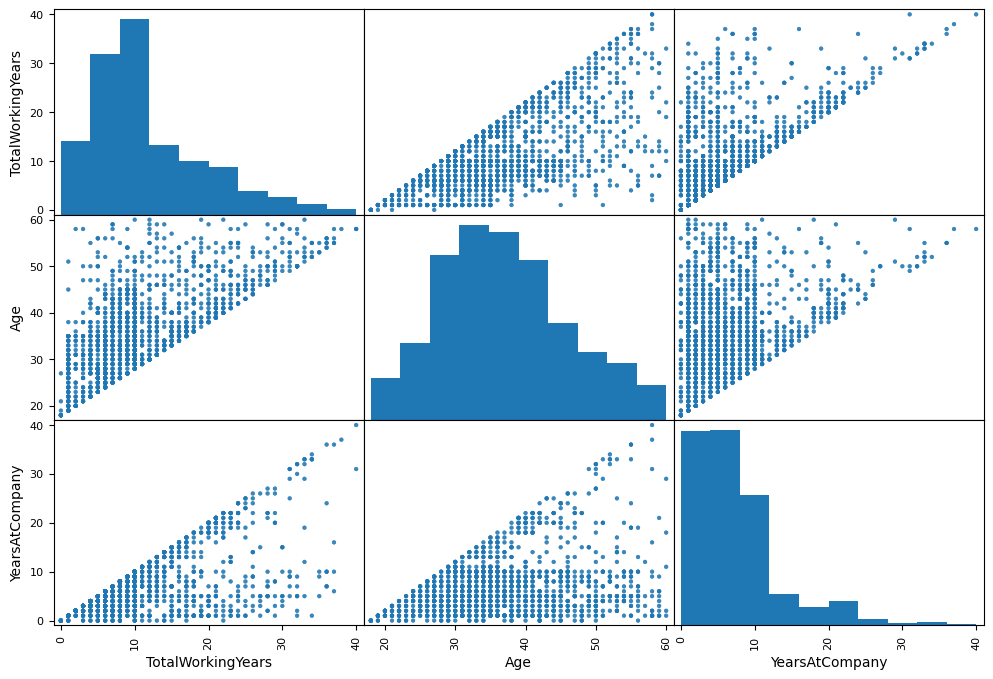

In [41]:
from pandas.plotting import scatter_matrix 

attributes = ["TotalWorkingYears", "Age", "YearsAtCompany"] 
scatter_matrix(general_data[attributes], figsize=(12, 8)) 

In [48]:
from pandas.plotting import scatter_matrix 


scatter_matrix(general_data['Attrition'], figsize=(12, 8)) 

AttributeError: 'Series' object has no attribute 'columns'

In [28]:
missing_NCW_rows = general_data[general_data['NumCompaniesWorked'].isna()]
missing_NCW_rows

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,1,116,Male,...,NaN,Y,12,8,1,5.0,2,5,0,4
210,52,No,Travel_Rarely,Sales,2,1,Medical,1,211,Male,...,NaN,Y,11,8,1,18.0,2,10,6,9
343,40,No,Travel_Frequently,Sales,9,3,Marketing,1,344,Male,...,NaN,Y,14,8,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,1,477,Male,...,NaN,Y,21,8,1,4.0,2,4,1,1
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,1,648,Female,...,NaN,Y,16,8,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,1,800,Female,...,NaN,Y,17,8,3,7.0,1,5,0,0
932,32,No,Travel_Rarely,Research & Development,5,4,Technical Degree,1,933,Male,...,NaN,Y,13,8,0,10.0,5,9,1,6
1103,26,No,Travel_Frequently,Sales,16,2,Life Sciences,1,1104,Male,...,NaN,Y,14,8,0,8.0,3,7,7,7
1312,37,Yes,Travel_Rarely,Human Resources,9,3,Human Resources,1,1313,Male,...,NaN,Y,17,8,0,7.0,4,3,0,2
1521,31,No,Travel_Rarely,Research & Development,20,1,Technical Degree,1,1522,Female,...,NaN,Y,13,8,1,6.0,3,5,0,3


In [21]:
print(f"Median age : {general_data['Age'].median()}")
print(f"Mean age : {general_data['Age'].mean()}")
print(f"Ecart age : {general_data['Age'].std()}")

Median age : 36.0
Mean age : 36.923809523809524
Ecart age : 9.133301271011184


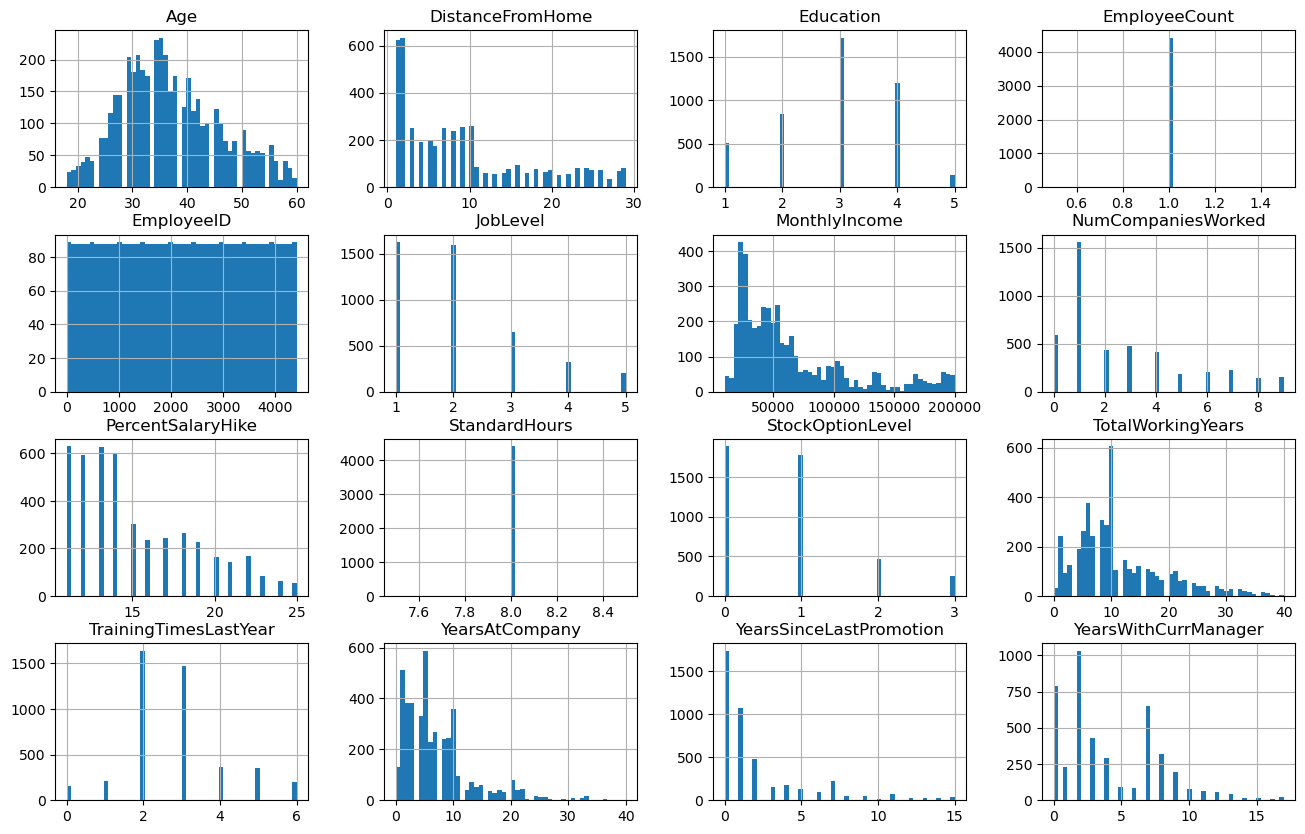

In [5]:
general_data.hist(bins=50, figsize=(16,10))
plt.show()

In [8]:
a = pd.Series(general_data["Age"])
a.value_counts()

Age
35    234
34    231
31    207
36    207
29    204
32    183
30    180
38    174
33    174
40    171
37    150
28    144
27    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
24     78
25     78
49     72
47     72
55     66
48     57
51     57
53     57
52     54
54     54
22     48
58     42
23     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

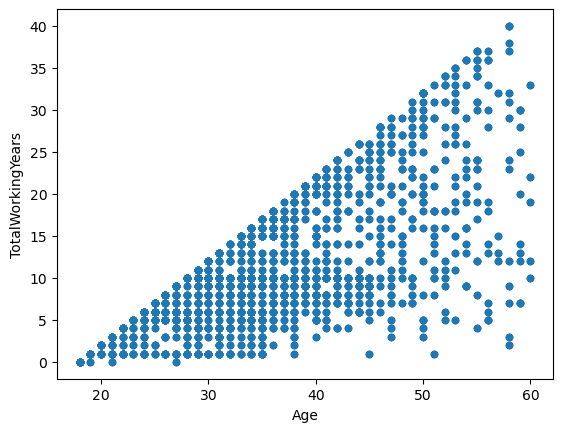

In [39]:
general_data.plot(kind='scatter', x="Age", y="TotalWorkingYears")

Médiane des années travaillées : 12.0
Moyenne des années travaillées : 13.194117647058823
Écart-type : 5.926868974767825


C:\Users\nemgb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


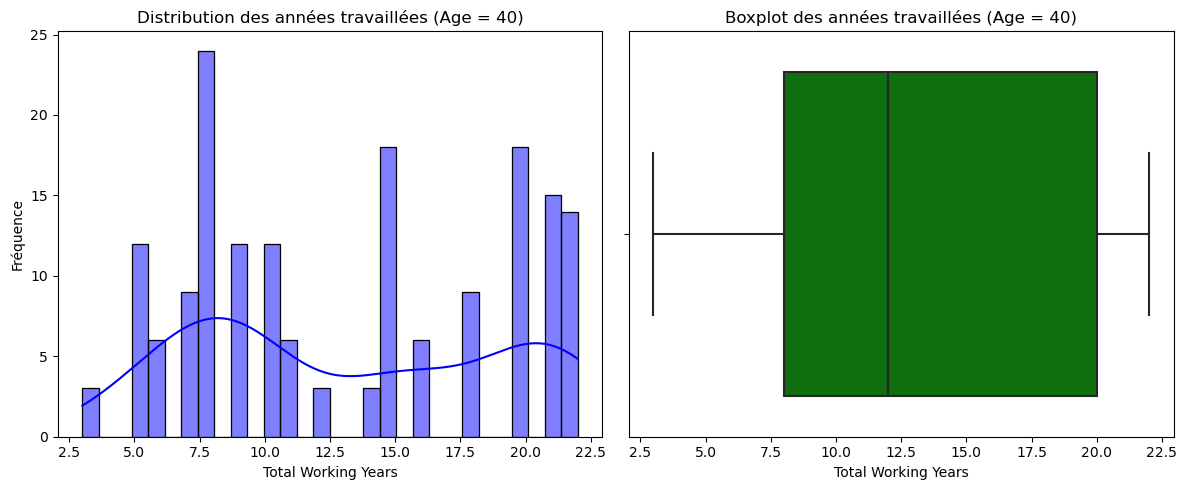

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = general_data[general_data['Age'] == 40]

working_years = filtered_data['TotalWorkingYears']

median_age = working_years.median()
mean_age = working_years.mean()
std_dev = working_years.std()

print(f"Médiane des années travaillées : {median_age}")
print(f"Moyenne des années travaillées : {mean_age}")
print(f"Écart-type : {std_dev}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(working_years, bins=30, kde=True, color="blue")
plt.xlabel("Total Working Years")
plt.ylabel("Fréquence")
plt.title("Distribution des années travaillées (Age = 40)")


plt.subplot(1, 2, 2)
sns.boxplot(x=working_years, color="green")
plt.xlabel("Total Working Years")
plt.title("Boxplot des années travaillées (Age = 40)")

plt.tight_layout()
plt.show()


In [18]:
median = general_data["TotalWorkingYears"].median() 
general_data["TotalWorkingYears"].fillna(median, inplace=True)

In [19]:
general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [20]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
manager_survey_data = pd.read_csv('C:/Users/nemgb/Downloads/manager_survey_data.csv')

In [9]:
manager_survey_data

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [10]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


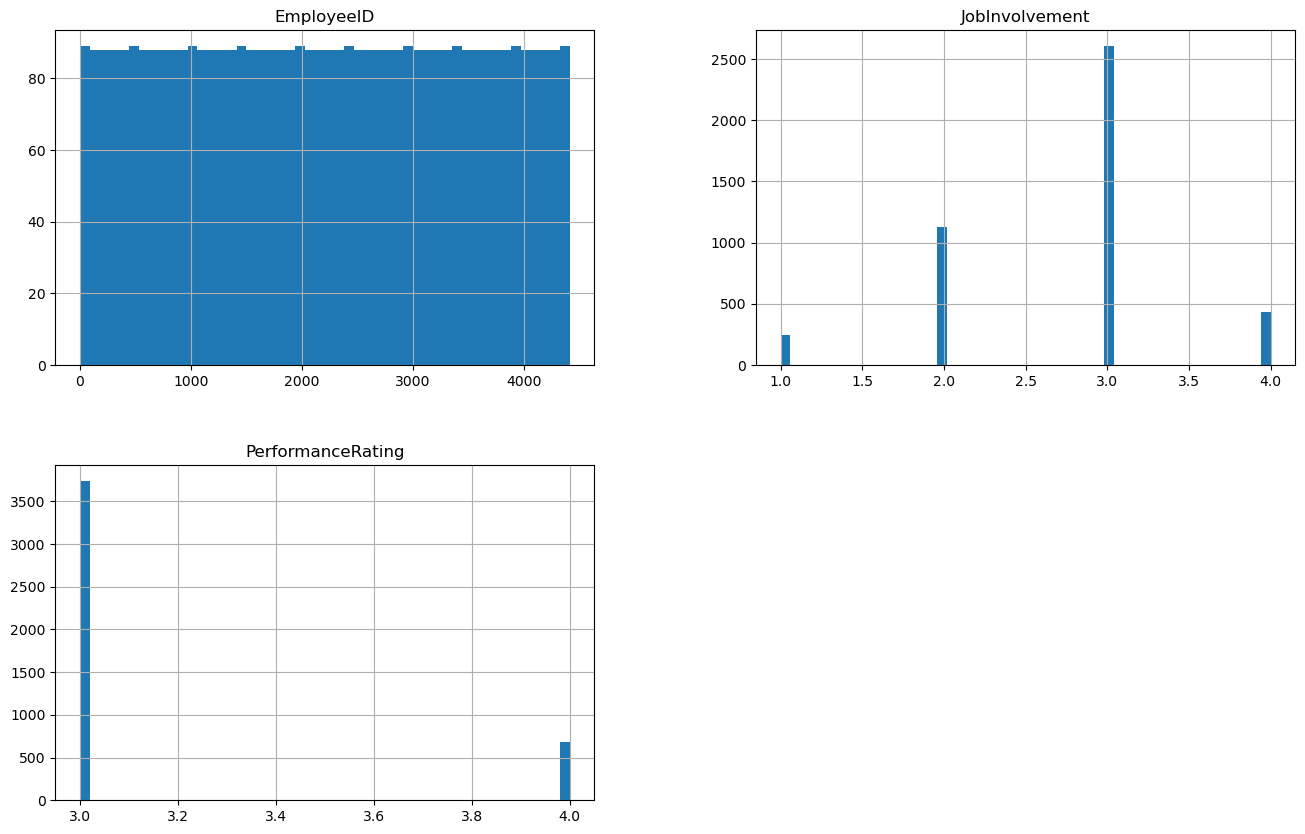

In [11]:
manager_survey_data.hist(bins=50, figsize=(16,10))
plt.show()

In [12]:
employee_survey_data = pd.read_csv('C:/Users/nemgb/Downloads/employee_survey_data.csv')

In [13]:
employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [14]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


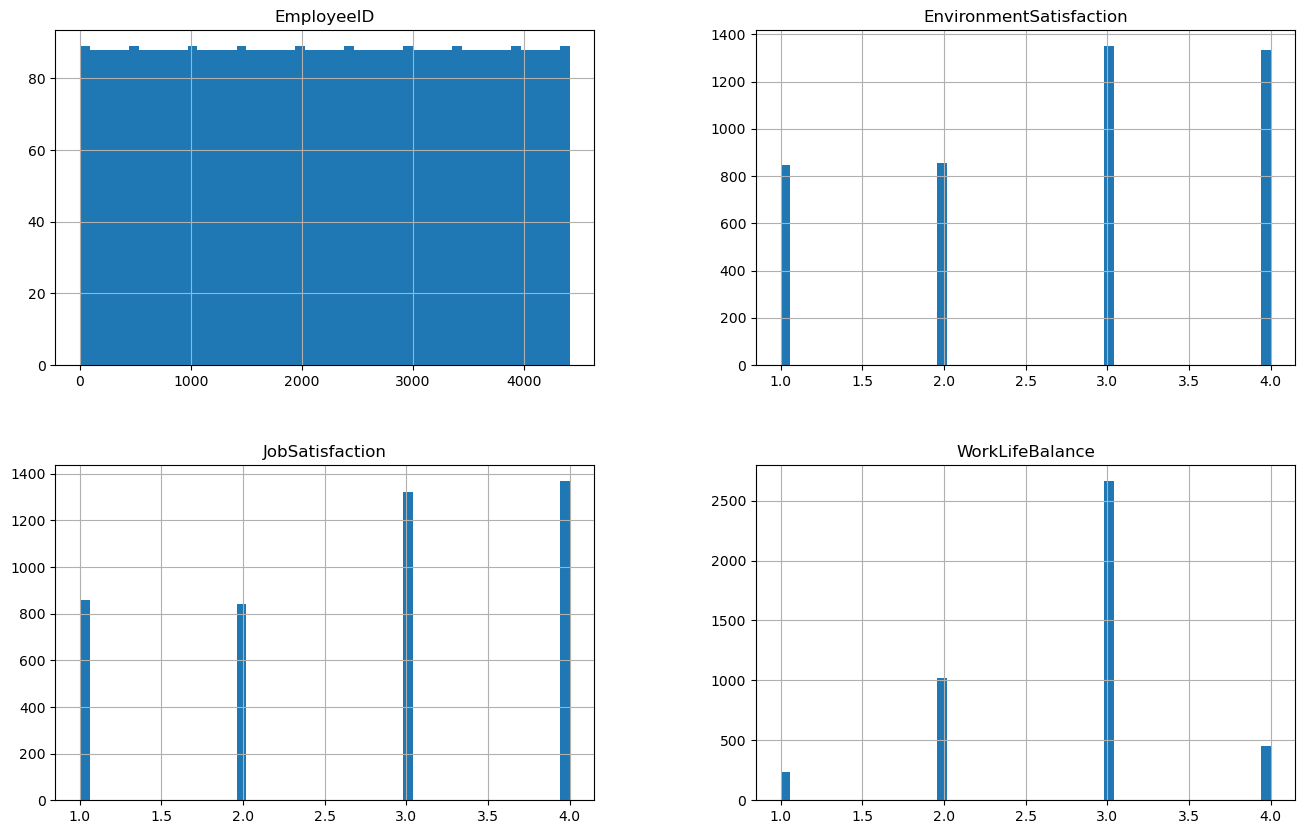

In [15]:
employee_survey_data.hist(bins=50, figsize=(16,10))
plt.show()

In [11]:
in_time = pd.read_csv('C:/Users/nemgb/Downloads/in_out_time/in_time.csv')

In [13]:
in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [15]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [17]:
a = pd.Series(in_time["2015-01-02"])
a.value_counts()

2015-01-02
2015-01-02 10:01:29    8
2015-01-02 10:10:13    7
2015-01-02 10:11:52    6
2015-01-02 10:07:01    6
2015-01-02 10:00:46    6
                      ..
2015-01-02 10:26:57    1
2015-01-02 10:15:03    1
2015-01-02 09:58:27    1
2015-01-02 09:55:11    1
2015-01-02 09:59:09    1
Name: count, Length: 2551, dtype: int64

In [12]:
out_time = pd.read_csv('C:/Users/nemgb/Downloads/in_out_time/out_time.csv')

In [51]:
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45
